#Import Libraries

In [ ]:
pip install simpy

In [ ]:
import numpy as np
import pandas as pd
import random
import time
from datetime import timedelta
# import simpy
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# uploading dataset and its visualization

In [ ]:
df = pd.read_csv('Lift dataset.csv')

In [ ]:
df

,Time,Elevator ID,Elevator Current Floor,Requested From Floor,Requested To Floor,Difference initial to from floor,Difference from tot to floor,Time of Travel,Waiting Time,Occupancy,No of stops
0,8:00:00,1,3,2,7,1,5,0:02:00,0:01:00,1,3
1,8:02:00,2,5,4,1,1,3,0:03:00,0:02:00,4,1
2,8:05:00,1,7,9,3,2,6,0:03:30,0:02:30,3,3
3,8:09:30,3,2,6,8,4,2,0:01:30,0:00:30,3,2
4,8:11:00,2,1,8,2,7,6,0:03:00,0:02:00,4,4
...,...,...,...,...,...,...,...,...,...,...,...
120,17:48:00,2,5,7,5,2,2,0:02:00,0:01:00,2,1
121,17:50:00,3,4,1,7,3,6,0:03:30,0:02:30,4,2
122,17:53:30,1,7,8,3,1,5,0:02:30,0:01:30,3,5
123,17:56:00,2,2,5,9,3,4,0:03:00,0:02:00,2,1


#parameters to work on

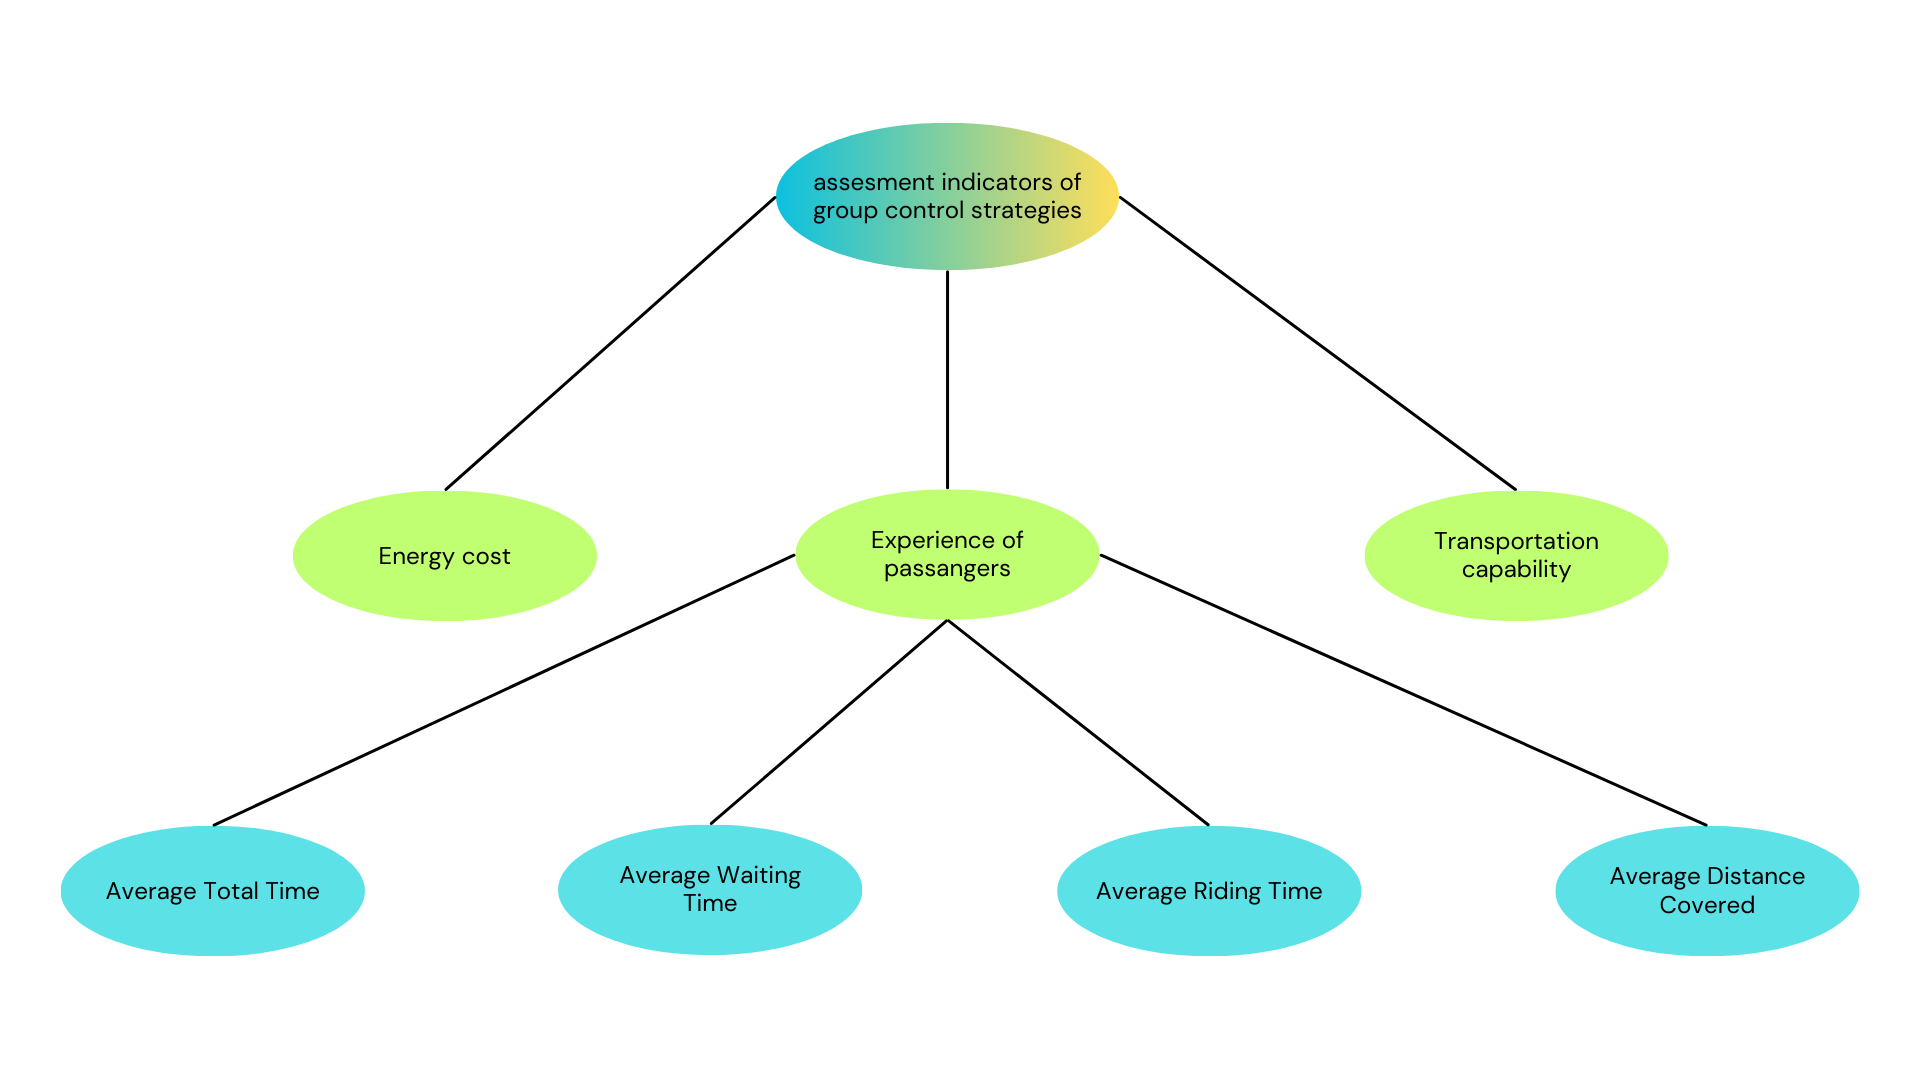

# lift assignment using shortest distance approach

In [ ]:
sLength = len(df['Requested To Floor'])
df['dist_el_id'] = pd.Series(np.random.randn(sLength), index=df.index)
df["dist_el_id_tot_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["dist_el_id_waiting_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["dist_el_id_riding_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["dist_nst(waiting)"]=pd.Series(np.random.randint(sLength), index=df.index)
df["dist"]=pd.Series(np.random.randn(sLength), index=df.index)


In [ ]:
class Lift:
    def __init__(self, id):
        self.id = id
        self.current_floor = 1  # Assuming lifts start from the first floor

def get_travel_dist(current_floor, target_floor,from_floor):
    # Simulating dynamic traffic conditions

    travel_dist=(abs(from_floor - target_floor) + abs(from_floor - current_floor))*10
    return travel_dist

def get_travel_time(current_floor, target_floor):
    travel_time = abs(current_floor - target_floor)*7
    return travel_time

def get_waiting_time(nst):
    return 5*nst

def assign_lift(requested_floor, lifts,from_floor):
    min_total_dist = float('inf')
    assigned_lift = None

    for lift in lifts:
        travel_dist = get_travel_dist(lift.current_floor, requested_floor,from_floor)
        total_dist = travel_dist
        if total_dist < min_total_dist:
            min_total_dist = total_dist
            assigned_lift = lift

    return assigned_lift,min_total_dist

def simulate_lift_calls(lifts):
    for i in range(125):
        requested_floor = df["Requested To Floor"][i]
        from_floor=df["Requested From Floor"][i]
        nst=df["No of stops"][i]
        assigned_lift,dist = assign_lift(requested_floor, lifts,from_floor)
        df["dist_el_id"][i]=assigned_lift.id
        a=abs(assigned_lift.current_floor - from_floor)
        if a<=0:
          nstw=0
        else:
          nstw=np.random.randint(0,a)
        waiting_time = get_travel_time(assigned_lift.current_floor, from_floor)+get_waiting_time(nstw)
        riding_time = get_travel_time(requested_floor, from_floor)+ get_waiting_time(nst)
        total_time = waiting_time + riding_time
        df["dist_el_id_tot_time"][i]=total_time
        df["dist_el_id_waiting_time"][i]=waiting_time
        df["dist_el_id_riding_time"][i]=riding_time
        df["dist_nst(waiting)"]=nstw
        df["dist"][i]=dist
        print(f"Call to Floor {requested_floor}: Assign Lift {assigned_lift.id} ,distance covered:{dist} ,time {total_time}")
        #time.sleep(2)  # Simulating asynchronous calls

        # Move the assigned lift to the requested floor
        assigned_lift.current_floor = requested_floor

# Initialize lifts
lifts = [Lift(1), Lift(2), Lift(3)]

# Simulate lift calls
simulate_lift_calls(lifts)


<ipython-input-6-a872b2fd73e8>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist_el_id"][i]=assigned_lift.id
<ipython-input-6-a872b2fd73e8>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist_el_id_tot_time"][i]=total_time
<ipython-input-6-a872b2fd73e8>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist_el_id_waiting_time"][i]=waiting_time
<ipython-input-6-a872b2fd73e8>:49: SettingWithCopyWarning: 
A value is tr

Call to Floor 7: Assign Lift 1 ,distance covered:60 ,time 57
Call to Floor 1: Assign Lift 1 ,distance covered:60 ,time 47
Call to Floor 3: Assign Lift 1 ,distance covered:140 ,time 138
Call to Floor 8: Assign Lift 1 ,distance covered:50 ,time 50
Call to Floor 2: Assign Lift 1 ,distance covered:60 ,time 62
Call to Floor 4: Assign Lift 1 ,distance covered:40 ,time 48
Call to Floor 6: Assign Lift 1 ,distance covered:40 ,time 33
Call to Floor 7: Assign Lift 2 ,distance covered:60 ,time 57
Call to Floor 2: Assign Lift 2 ,distance covered:90 ,time 73
Call to Floor 8: Assign Lift 2 ,distance covered:60 ,time 52
Call to Floor 1: Assign Lift 1 ,distance covered:70 ,time 64
Call to Floor 8: Assign Lift 2 ,distance covered:40 ,time 53
Call to Floor 4: Assign Lift 2 ,distance covered:60 ,time 57
Call to Floor 6: Assign Lift 2 ,distance covered:20 ,time 34
Call to Floor 3: Assign Lift 2 ,distance covered:30 ,time 36
Call to Floor 7: Assign Lift 2 ,distance covered:40 ,time 43
Call to Floor 9: Assig

In [ ]:
df.head()

,Time,Elevator ID,Elevator Current Floor,Requested From Floor,Requested To Floor,Difference initial to from floor,Difference from tot to floor,Time of Travel,Waiting Time,Occupancy,No of stops,dist_el_id,dist_el_id_tot_time,dist_el_id_waiting_time,dist_el_id_riding_time,dist_nst(waiting),dist
0,8:00:00,1,3,2,7,1,5,0:02:00,0:01:00,1,3,1.0,57.0,7.0,50.0,0,60.0
1,8:02:00,2,5,4,1,1,3,0:03:00,0:02:00,4,1,1.0,47.0,21.0,26.0,0,60.0
2,8:05:00,1,7,9,3,2,6,0:03:30,0:02:30,3,3,1.0,138.0,81.0,57.0,0,140.0
3,8:09:30,3,2,6,8,4,2,0:01:30,0:00:30,3,2,1.0,50.0,26.0,24.0,0,50.0
4,8:11:00,2,1,8,2,7,6,0:03:00,0:02:00,4,4,1.0,62.0,0.0,62.0,0,60.0


# lift assignment using minimum time approach

In [ ]:
sLength = len(df['Requested To Floor'])
df['time_el_id'] = pd.Series(np.random.randn(sLength), index=df.index)
df["time_el_id_tot_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["time_el_id_waiting_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["time_el_id_riding_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["time_dist"]=pd.Series(np.random.randn(sLength), index=df.index)
df["time_nst(waiting)"]=pd.Series(np.random.randint(sLength), index=df.index)
df

,Time,Elevator ID,Elevator Current Floor,Requested From Floor,Requested To Floor,Difference initial to from floor,Difference from tot to floor,Time of Travel,Waiting Time,Occupancy,...,dist_el_id_waiting_time,dist_el_id_riding_time,dist_nst(waiting),dist,time_el_id,time_el_id_tot_time,time_el_id_waiting_time,time_el_id_riding_time,time_dist,time_nst(waiting)
0,8:00:00,1,3,2,7,1,5,0:02:00,0:01:00,1,...,7.0,50.0,0,60.0,1.223002,0.199923,-1.571987,-1.325408,1.019572,119
1,8:02:00,2,5,4,1,1,3,0:03:00,0:02:00,4,...,21.0,26.0,0,60.0,0.118827,-0.307091,0.268173,1.026473,-0.022016,119
2,8:05:00,1,7,9,3,2,6,0:03:30,0:02:30,3,...,81.0,57.0,0,140.0,-1.914861,-1.615473,1.298234,1.799216,1.413458,119
3,8:09:30,3,2,6,8,4,2,0:01:30,0:00:30,3,...,26.0,24.0,0,50.0,0.782607,1.143231,0.449998,-0.460903,-0.153590,119
4,8:11:00,2,1,8,2,7,6,0:03:00,0:02:00,4,...,0.0,62.0,0,60.0,0.966032,-0.448933,-0.963108,-1.357784,-2.237938,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,17:48:00,2,5,7,5,2,2,0:02:00,0:01:00,2,...,7.0,19.0,0,30.0,-0.075397,-0.989924,1.599285,0.612573,-0.922020,119
121,17:50:00,3,4,1,7,3,6,0:03:30,0:02:30,4,...,0.0,52.0,0,60.0,-0.142348,0.650703,0.709639,-0.851879,-0.187415,119
122,17:53:30,1,7,8,3,1,5,0:02:30,0:01:30,3,...,7.0,60.0,0,60.0,-0.351052,0.684482,0.940677,-0.448631,0.710356,119
123,17:56:00,2,2,5,9,3,4,0:03:00,0:02:00,2,...,0.0,33.0,0,40.0,-0.357601,-0.802496,0.455943,-0.704031,1.194717,119


In [ ]:


class Lift:
    def __init__(self, id):
        self.id = id
        self.current_floor = 1  # Assuming lifts start from the first floor

def get_travel_dist(current_floor, target_floor,from_floor):
    # Simulating dynamic traffic conditions

    travel_dist=(abs(from_floor - target_floor) + abs(from_floor - current_floor))*10
    return travel_dist

def get_travel_time(current_floor, target_floor):
    travel_time = abs(current_floor - target_floor)*7
    return travel_time


def get_waiting_time(nst):
    return 5*nst

def assign_lift(requested_floor, lifts,from_floor,nst):
    min_total_time = float('inf')
    assigned_lift = None
    nstwf=0
    for lift in lifts:
        a=abs(lift.current_floor - from_floor)
        if a<=0:
          nstw=0
        else:
          nstw=np.random.randint(0,a)
        travel_time = get_travel_time(lift.current_floor, from_floor)+ get_travel_time(from_floor, requested_floor)+get_waiting_time(nst)+get_waiting_time(nstw)
        total_time = travel_time
        if total_time < min_total_time:
            min_total_time = total_time
            assigned_lift = lift
            nstwf=nstw

    return assigned_lift,min_total_time,nstwf

def simulate_lift_calls(lifts):
    for i in range(125):
        requested_floor = df["Requested To Floor"][i]
        from_floor=df["Requested From Floor"][i]
        nst=df["No of stops"][i]
        assigned_lift,total_time,nstw = assign_lift(requested_floor, lifts,from_floor,nst)
        df["time_el_id"][i]=assigned_lift.id
        waiting_time = get_travel_time(assigned_lift.current_floor, from_floor)+ get_waiting_time(nstw)
        riding_time = get_travel_time(requested_floor, from_floor)+ get_waiting_time(nst)
        dist=get_travel_dist(assigned_lift.current_floor, requested_floor,from_floor)
        df["time_el_id_tot_time"][i]=total_time
        df["time_el_id_waiting_time"][i]=waiting_time
        df["time_el_id_riding_time"][i]=riding_time
        df["time_dist"][i]=dist
        df["time_nst(waiting)"][i]=nstw
        print(f"Call to Floor {requested_floor}: Assign Lift {assigned_lift.id} ,time {total_time} ,distance {dist}")
        #time.sleep(1)  # Simulating asynchronous calls

        # Move the assigned lift to the requested floor
        assigned_lift.current_floor = requested_floor

# Initialize lifts
lifts = [Lift(1), Lift(2), Lift(3)]

# Simulate lift calls
simulate_lift_calls(lifts)


<ipython-input-9-1066b121b66b>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_el_id"][i]=assigned_lift.id
<ipython-input-9-1066b121b66b>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_el_id_tot_time"][i]=total_time
<ipython-input-9-1066b121b66b>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_el_id_waiting_time"][i]=waiting_time
<ipython-input-9-1066b121b66b>:51: SettingWithCopyWarning: 
A value is tr

Call to Floor 7: Assign Lift 1 ,time 57 ,distance 60
Call to Floor 1: Assign Lift 1 ,time 47 ,distance 60
Call to Floor 3: Assign Lift 1 ,time 113 ,distance 140
Call to Floor 8: Assign Lift 1 ,time 55 ,distance 50
Call to Floor 2: Assign Lift 1 ,time 62 ,distance 60
Call to Floor 4: Assign Lift 1 ,time 58 ,distance 40
Call to Floor 6: Assign Lift 1 ,time 33 ,distance 40
Call to Floor 7: Assign Lift 2 ,time 57 ,distance 60
Call to Floor 2: Assign Lift 2 ,time 73 ,distance 90
Call to Floor 8: Assign Lift 2 ,time 52 ,distance 60
Call to Floor 1: Assign Lift 1 ,time 64 ,distance 70
Call to Floor 8: Assign Lift 2 ,time 53 ,distance 40
Call to Floor 4: Assign Lift 2 ,time 57 ,distance 60
Call to Floor 6: Assign Lift 2 ,time 34 ,distance 20
Call to Floor 3: Assign Lift 2 ,time 36 ,distance 30
Call to Floor 7: Assign Lift 2 ,time 43 ,distance 40
Call to Floor 9: Assign Lift 2 ,time 29 ,distance 20
Call to Floor 2: Assign Lift 2 ,time 59 ,distance 70
Call to Floor 6: Assign Lift 2 ,time 33 ,dis

In [ ]:
df.head()

,Time,Elevator ID,Elevator Current Floor,Requested From Floor,Requested To Floor,Difference initial to from floor,Difference from tot to floor,Time of Travel,Waiting Time,Occupancy,...,dist_el_id_waiting_time,dist_el_id_riding_time,dist_nst(waiting),dist,time_el_id,time_el_id_tot_time,time_el_id_waiting_time,time_el_id_riding_time,time_dist,time_nst(waiting)
0,8:00:00,1,3,2,7,1,5,0:02:00,0:01:00,1,...,7.0,50.0,0,60.0,1.0,57.0,7.0,50.0,60.0,0
1,8:02:00,2,5,4,1,1,3,0:03:00,0:02:00,4,...,21.0,26.0,0,60.0,1.0,47.0,21.0,26.0,60.0,0
2,8:05:00,1,7,9,3,2,6,0:03:30,0:02:30,3,...,81.0,57.0,0,140.0,1.0,113.0,56.0,57.0,140.0,0
3,8:09:30,3,2,6,8,4,2,0:01:30,0:00:30,3,...,26.0,24.0,0,50.0,1.0,55.0,31.0,24.0,50.0,2
4,8:11:00,2,1,8,2,7,6,0:03:00,0:02:00,4,...,0.0,62.0,0,60.0,1.0,62.0,0.0,62.0,60.0,0


#Basic parametets and weight calculations

In [ ]:

dist_att=df["dist_el_id_tot_time"].mean()
dist_awt=df["dist_el_id_waiting_time"].mean()
dist_art= df["dist_el_id_riding_time"].mean()
dist_ad=df["dist"].mean()

dist_mtt=df["dist_el_id_tot_time"].min()
dist_mwt=df["dist_el_id_waiting_time"].min()
dist_mrt= df["dist_el_id_riding_time"].min()
dist_md=df["dist"].min()

w1_dist=dist_mtt/dist_att
w2_dist=dist_mwt/dist_awt
w3_dist=dist_mrt/dist_art
w4_dist=dist_md/dist_ad

print(f"Parameters using shortest distance algorithm \n\n average total time {dist_att}\n average waiting time {dist_awt}\n average riding time {dist_art}\n average distance covered {dist_ad}")
print(f"\n minimum total time {dist_mtt}\n minimum waiting time {dist_mwt}\n minimum riding time {dist_mrt}\n minimum distance covered {dist_md}")
print(f"\n w1 {w1_dist}\n w2 {w2_dist}\n w3 {w3_dist}\n w4={w4_dist}")

time_att=df["time_el_id_tot_time"].mean()
time_awt=df["time_el_id_waiting_time"].mean()
time_art= df["time_el_id_riding_time"].mean()
time_ad=df["time_dist"].mean()

time_mtt=df["time_el_id_tot_time"].min()
time_mwt=df["time_el_id_waiting_time"].min()
time_mrt= df["time_el_id_riding_time"].min()
time_md=df["time_dist"].min()

w1_time=time_mtt/time_att
w2_time=time_mwt/time_awt
w3_time=time_mrt/time_art
w4_time=dist_md/dist_ad

print(f"Parameters using minimum time algorithm \n\n average total time {time_att}\n average waiting time {time_awt}\n average riding time {time_art}\naverage distance covered {time_ad}")
print(f"\n minimum total time {time_mtt}\n minimum waiting time {time_mwt}\n minimum riding time {time_mrt}\naverage distance covered {time_md}")
print(f"\n w1 {w1_time}\n w2 {w2_time}\n w3 {w3_time}\n  w4{w4_time} ")

Parameters using shortest distance algorithm 

 average total time 51.848
 average waiting time 10.2
 average riding time 41.648
 average distance covered 52.24

 minimum total time 17.0
 minimum waiting time 0.0
 minimum riding time 12.0
 minimum distance covered 10.0

 w1 0.32788149976855424
 w2 0.0
 w3 0.2881290818286592
 w4=0.1914241960183767
Parameters using minimum time algorithm 

 average total time 50.736
 average waiting time 9.088
 average riding time 41.648
average distance covered 51.28

 minimum total time 17.0
 minimum waiting time 0.0
 minimum riding time 12.0
average distance covered 10.0

 w1 0.3350678019552192
 w2 0.0
 w3 0.2881290818286592
  w40.1914241960183767 


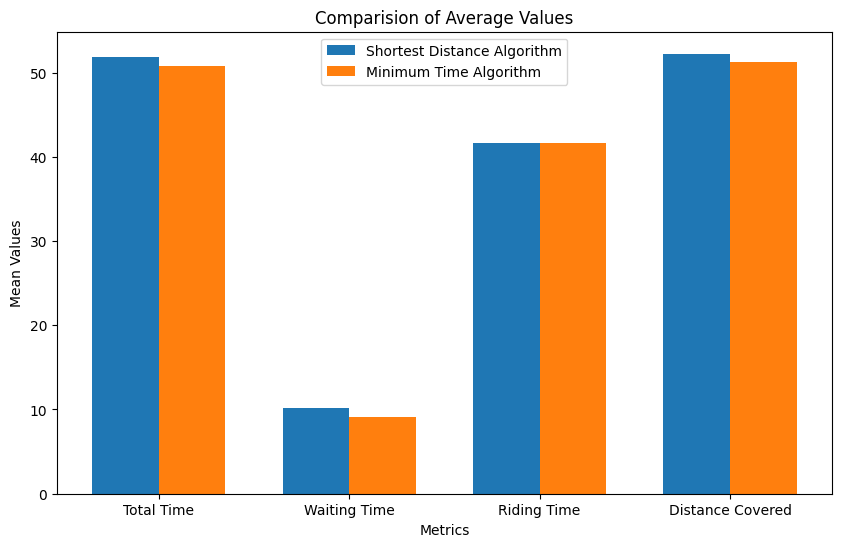

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dist_att = df["dist_el_id_tot_time"].mean()
time_att = df["time_el_id_tot_time"].mean()

dist_awt = df["dist_el_id_waiting_time"].mean()
time_awt = df["time_el_id_waiting_time"].mean()

dist_art = df["dist_el_id_riding_time"].mean()
time_art = df["time_el_id_riding_time"].mean()

dist_ad = df["dist"].mean()
time_ad = df["time_dist"].mean()


metrics_names = ['Total Time', 'Waiting Time', 'Riding Time', 'Distance Covered']

dist_values = [dist_att, dist_awt, dist_art, dist_ad]
time_values = [time_att, time_awt, time_art, time_ad]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))


bar1 = ax.bar(np.arange(len(metrics_names)), dist_values, bar_width, label='Shortest Distance Algorithm')
bar2 = ax.bar(np.arange(len(metrics_names)) + bar_width, time_values, bar_width, label='Minimum Time Algorithm')


ax.set_xlabel('Metrics')
ax.set_ylabel('Mean Values')
ax.set_title('Comparision of Average Values')
ax.set_xticks(np.arange(len(metrics_names)) + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.legend()


plt.show()


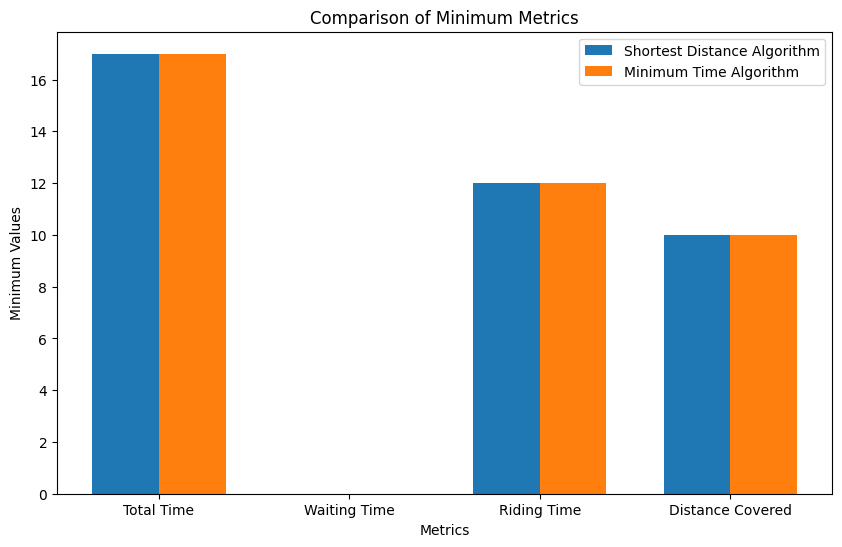

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dist_mtt = df["dist_el_id_tot_time"].min()
time_mtt = df["time_el_id_tot_time"].min()

dist_mwt = df["dist_el_id_waiting_time"].min()
time_mwt = df["time_el_id_waiting_time"].min()

dist_mrt = df["dist_el_id_riding_time"].min()
time_mrt = df["time_el_id_riding_time"].min()

dist_md = df["dist"].min()
time_md = df["time_dist"].min()

metrics_names = ['Total Time', 'Waiting Time', 'Riding Time', 'Distance Covered']

dist_values = [dist_mtt, dist_mwt, dist_mrt, dist_md]
time_values = [time_mtt, time_mwt, time_mrt, time_md]

bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(metrics_names)), dist_values, bar_width, label='Shortest Distance Algorithm')
bar2 = ax.bar(np.arange(len(metrics_names)) + bar_width, time_values, bar_width, label='Minimum Time Algorithm')

ax.set_xlabel('Metrics')
ax.set_ylabel('Minimum Values')
ax.set_title('Comparison of Minimum Metrics')
ax.set_xticks(np.arange(len(metrics_names)) + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.show()


# Assesment results for different rate of passanger flow throughout the day

In [ ]:
from datetime import datetime
morning_peak_start = datetime.strptime("08:00", "%H:%M").time()
morning_peak_end = datetime.strptime("10:00", "%H:%M").time()
morning_normal_start = datetime.strptime("10:00", "%H:%M").time()
morning_normal_end = datetime.strptime("12:00", "%H:%M").time()
lunch_start = datetime.strptime("12:00", "%H:%M").time()
lunch_end = datetime.strptime("14:00", "%H:%M").time()
afternoon_start = datetime.strptime("14:00", "%H:%M").time()
afternoon_end = datetime.strptime("17:00", "%H:%M").time()
evening_start = datetime.strptime("17:00", "%H:%M").time()
evening_end = datetime.strptime("20:00", "%H:%M").time()
afterhours_start = datetime.strptime("20:00", "%H:%M").time()


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

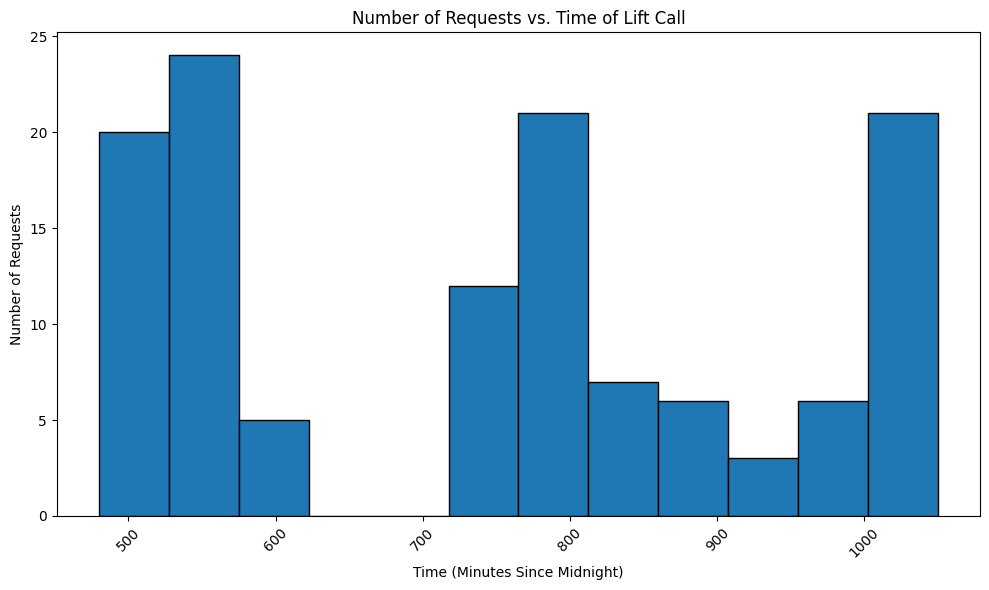

In [ ]:
from datetime import datetime, time, timedelta

# Filter rows starting from 7:30 in the morning
start_time = time(7, 30)
df = df[df['Time'] >= start_time]

# Round the 'Time' column to half-hour intervals
df['Time_Rounded'] = df['Time'].apply(lambda x: time(x.hour, x.minute // 30 * 30))

# Convert 'Time_Rounded' to total minutes since midnight
df['Time_Rounded_Minutes'] = df['Time_Rounded'].apply(lambda x: x.hour * 60 + x.minute)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Time_Rounded_Minutes'], bins=12, edgecolor='black')
plt.title('Number of Requests vs. Time of Lift Call')
plt.xlabel('Time (Minutes Since Midnight)')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

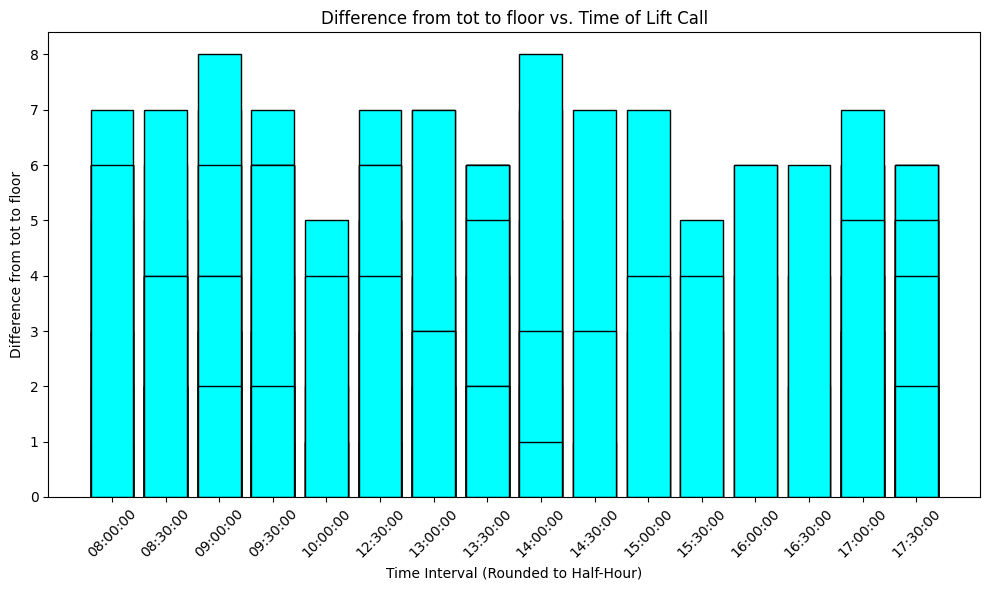

In [ ]:

# Convert 'Time' column to datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Filter rows starting from 7:30 in the morning
start_time = time(7, 30)
df = df[df['Time'] >= start_time]

# Round the 'Time' column to half-hour intervals
df['Time_Rounded'] = df['Time'].apply(lambda x: time(x.hour, x.minute // 30 * 30))

# Convert 'Time_Rounded' to strings for plotting
df['Time_Rounded_Str'] = df['Time_Rounded'].astype(str)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Time_Rounded_Str'], df['Difference from tot to floor'], color='cyan', edgecolor='black')
plt.title('Difference from tot to floor vs. Time of Lift Call')
plt.xlabel('Time Interval (Rounded to Half-Hour)')
plt.ylabel('Difference from tot to floor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
def categorize_time(time):
    if morning_peak_start <= time <= morning_peak_end:
        return "Morning Peak"
    elif morning_normal_start <= time <= morning_normal_end:
        return "Morning Normal"
    elif lunch_start <= time <= lunch_end:
        return "Lunch"
    elif afternoon_start <= time <= afternoon_end:
        return "Afternoon"
    elif evening_start <= time <= evening_end:
        return "Evening"
    elif afterhours_start <= time or time < morning_end:
        return "After Hours"
    else:
        return "Undefined"

In [ ]:
# Iterate through your dataset and print the time category
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Extract the time component
df['Time'] = df['Time'].dt.time

In [ ]:
# Iterate through your dataset and print the time category
for index, row in df.iterrows():
    time = row['Time']
    time_category = categorize_time(time)
    print(f"Time: {time}, Category: {time_category}")


Time: 08:00:00, Category: Morning Peak
Time: 08:02:00, Category: Morning Peak
Time: 08:05:00, Category: Morning Peak
Time: 08:09:30, Category: Morning Peak
Time: 08:11:00, Category: Morning Peak
Time: 08:14:00, Category: Morning Peak
Time: 08:16:30, Category: Morning Peak
Time: 08:19:00, Category: Morning Peak
Time: 08:22:30, Category: Morning Peak
Time: 08:27:00, Category: Morning Peak
Time: 08:30:00, Category: Morning Peak
Time: 08:33:30, Category: Morning Peak
Time: 08:35:00, Category: Morning Peak
Time: 08:37:30, Category: Morning Peak
Time: 08:42:00, Category: Morning Peak
Time: 08:44:00, Category: Morning Peak
Time: 08:47:00, Category: Morning Peak
Time: 08:49:00, Category: Morning Peak
Time: 08:53:00, Category: Morning Peak
Time: 08:56:30, Category: Morning Peak
Time: 09:00:00, Category: Morning Peak
Time: 09:03:00, Category: Morning Peak
Time: 09:05:30, Category: Morning Peak
Time: 09:08:00, Category: Morning Peak
Time: 09:10:00, Category: Morning Peak
Time: 09:12:30, Category:

In [ ]:
#yo yo yo

# Initialize variables to store aggregated metrics
total_time_d =0
total_waiting_time_d =0
total_riding_time_d =0
total_long_time_waiting_d = 0
total_distance_d = 0
total_stops_d = 0
total_passengers = 0
shortest_distance_d = float('inf')
long_waiting_times_count_d = 0
total_time_t =0
total_waiting_time_t =0
total_riding_time_t =0
total_long_time_waiting_t = 0
total_distance_t = 0
total_stops_t = 0
shortest_distance_t = float('inf')
long_waiting_times_count_t = 0
i=1

threshold_long_waiting_time = 300  # (5 minutes)

for index, row in df.iterrows():
    time = row['Time']
    time_category = categorize_time(time)

    # Check if the time category matches the morning peak mode
    if time_category == "Morning Peak":
        total_time_d+=row["dist_el_id_tot_time"]
        total_waiting_time_d += row["dist_el_id_waiting_time"]
        total_riding_time_d += row["dist_el_id_riding_time"]
        total_distance_d += row["dist"]
        total_stops_d += row['No of stops'] + row['dist_nst(waiting)']

        total_time_t +=row["time_el_id_tot_time"]
        total_waiting_time_t += row["time_el_id_waiting_time"]
        total_riding_time_t += row["time_el_id_riding_time"]
        total_distance_t += row["time_dist"]
        total_stops_t += row['No of stops'] + row['time_nst(waiting)']
        total_passengers += row['Occupancy']
        i+=1


dist_att=total_time_d/i
dist_awt=total_waiting_time_d/i
dist_art=total_riding_time_d/i
dist_ad=total_distance_d/i

time_att=total_time_t/i
time_awt=total_waiting_time_t/i
time_art=total_riding_time_t/i
time_ad=total_distance_t/i

data = [["Shortest Distance",dist_att, dist_awt,dist_art,dist_ad,total_stops_d] ,["Minimum Time",time_att, time_awt,time_art,time_ad,total_stops_t]]
df_m_p = pd.DataFrame(data, columns=['Algorithms','Average Total Time','Average Waiting Time', 'Average Riding Time', 'Average distance covered', 'Total Stops'])
# Print the summary table
print("Assessment result of Morning hour peak mode:")
print("-" * 60)
df_m_p


Assessment result of Morning hour peak mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,51.333333,10.333333,41.0,51.111111,124
1,Minimum Time,50.444444,9.444444,41.0,51.111111,132


In [ ]:

# Initialize variables to store aggregated metrics
total_time_d =0
total_waiting_time_d =0
total_riding_time_d =0
total_long_time_waiting_d = 0
total_distance_d = 0
total_stops_d = 0
total_passengers = 0
shortest_distance_d = float('inf')
long_waiting_times_count_d = 0
total_time_t =0
total_waiting_time_t =0
total_riding_time_t =0
total_long_time_waiting_t = 0
total_distance_t = 0
total_stops_t = 0
shortest_distance_t = float('inf')
long_waiting_times_count_t = 0
i=1

threshold_long_waiting_time = 300  # (5 minutes)

for index, row in df.iterrows():
    time = row['Time']
    time_category = categorize_time(time)

    # Check if the time category matches the morning peak mode
    if time_category == "Morning Normal":
        total_time_d+=row["dist_el_id_tot_time"]
        total_waiting_time_d += row["dist_el_id_waiting_time"]
        total_riding_time_d += row["dist_el_id_riding_time"]
        total_distance_d += row["dist"]
        total_stops_d += row['No of stops'] + row['dist_nst(waiting)']

        total_time_t +=row["time_el_id_tot_time"]
        total_waiting_time_t += row["time_el_id_waiting_time"]
        total_riding_time_t += row["time_el_id_riding_time"]
        total_distance_t += row["time_dist"]
        total_stops_t += row['No of stops'] + row['time_nst(waiting)']
        total_passengers += row['Occupancy']
        i+=1


dist_att=total_time_d/i
dist_awt=total_waiting_time_d/i
dist_art=total_riding_time_d/i
dist_ad=total_distance_d/i

time_att=total_time_t/i
time_awt=total_waiting_time_t/i
time_art=total_riding_time_t/i
time_ad=total_distance_t/i

data = [["Shortest Distance",dist_att, dist_awt,dist_art,dist_ad,total_stops_d] ,["Minimum Time",time_att, time_awt,time_art,time_ad,total_stops_t]]
df_m_n = pd.DataFrame(data, columns=['Algorithms','Average Total Time','Average Waiting Time', 'Average Riding Time', 'Average distance covered', 'Total Stops'])
# Print the summary table
print("Assessment result of Morning hour normal mode:")
print("-" * 60)
df_m_n



Assessment result of Morning hour normal mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,46.833333,19.166667,27.666667,46.666667,15
1,Minimum Time,35.833333,8.166667,27.666667,33.333333,15


In [ ]:

# Initialize variables to store aggregated metrics
total_time_d =0
total_waiting_time_d =0
total_riding_time_d =0
total_long_time_waiting_d = 0
total_distance_d = 0
total_stops_d = 0
total_passengers = 0
shortest_distance_d = float('inf')
long_waiting_times_count_d = 0
total_time_t =0
total_waiting_time_t =0
total_riding_time_t =0
total_long_time_waiting_t = 0
total_distance_t = 0
total_stops_t = 0
shortest_distance_t = float('inf')
long_waiting_times_count_t = 0
i=1

threshold_long_waiting_time = 300  # (5 minutes)

for index, row in df.iterrows():
    time = row['Time']
    time_category = categorize_time(time)

    # Check if the time category matches the morning peak mode
    if time_category == "Lunch":
        total_time_d+=row["dist_el_id_tot_time"]
        total_waiting_time_d += row["dist_el_id_waiting_time"]
        total_riding_time_d += row["dist_el_id_riding_time"]
        total_distance_d += row["dist"]
        total_stops_d += row['No of stops'] + row['dist_nst(waiting)']

        total_time_t +=row["time_el_id_tot_time"]
        total_waiting_time_t += row["time_el_id_waiting_time"]
        total_riding_time_t += row["time_el_id_riding_time"]
        total_distance_t += row["time_dist"]
        total_stops_t += row['No of stops'] + row['time_nst(waiting)']
        total_passengers += row['Occupancy']
        i+=1


dist_att=total_time_d/i
dist_awt=total_waiting_time_d/i
dist_art=total_riding_time_d/i
dist_ad=total_distance_d/i

time_att=total_time_t/i
time_awt=total_waiting_time_t/i
time_art=total_riding_time_t/i
time_ad=total_distance_t/i

data = [["Shortest Distance",dist_att, dist_awt,dist_art,dist_ad,total_stops_d] ,["Minimum Time",time_att, time_awt,time_art,time_ad,total_stops_t]]
df_l = pd.DataFrame(data, columns=['Algorithms','Average Total Time','Average Waiting Time', 'Average Riding Time', 'Average distance covered', 'Total Stops'])
# Print the summary table
print("Assessment result of Lunch mode:")
print("-" * 60)
df_l


Assessment result of Lunch mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,49.457143,9.285714,40.171429,49.428571,95
1,Minimum Time,49.342857,9.171429,40.171429,48.857143,106


In [ ]:

# Initialize variables to store aggregated metrics
total_time_d =0
total_waiting_time_d =0
total_riding_time_d =0
total_long_time_waiting_d = 0
total_distance_d = 0
total_stops_d = 0
total_passengers = 0
shortest_distance_d = float('inf')
long_waiting_times_count_d = 0
total_time_t =0
total_waiting_time_t =0
total_riding_time_t =0
total_long_time_waiting_t = 0
total_distance_t = 0
total_stops_t = 0
shortest_distance_t = float('inf')
long_waiting_times_count_t = 0
i=1

threshold_long_waiting_time = 300  # (5 minutes)

for index, row in df.iterrows():
    time = row['Time']
    time_category = categorize_time(time)

    # Check if the time category matches the morning peak mode
    if time_category == "Afternoon":
        total_time_d+=row["dist_el_id_tot_time"]
        total_waiting_time_d += row["dist_el_id_waiting_time"]
        total_riding_time_d += row["dist_el_id_riding_time"]
        total_distance_d += row["dist"]
        total_stops_d += row['No of stops'] + row['dist_nst(waiting)']

        total_time_t +=row["time_el_id_tot_time"]
        total_waiting_time_t += row["time_el_id_waiting_time"]
        total_riding_time_t += row["time_el_id_riding_time"]
        total_distance_t += row["time_dist"]
        total_stops_t += row['No of stops'] + row['time_nst(waiting)']
        total_passengers += row['Occupancy']
        i+=1


dist_att=total_time_d/i
dist_awt=total_waiting_time_d/i
dist_art=total_riding_time_d/i
dist_ad=total_distance_d/i

time_att=total_time_t/i
time_awt=total_waiting_time_t/i
time_art=total_riding_time_t/i
time_ad=total_distance_t/i

data = [["Shortest Distance",dist_att, dist_awt,dist_art,dist_ad,total_stops_d] ,["Minimum Time",time_att, time_awt,time_art,time_ad,total_stops_t]]
df_a = pd.DataFrame(data, columns=['Algorithms','Average Total Time','Average Waiting Time', 'Average Riding Time', 'Average distance covered', 'Total Stops'])
# Print the summary table
print("Assessment result of Afternoon mode:")
print("-" * 60)
df_a


Assessment result of Afternoon mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,49.086957,8.608696,40.478261,50.869565,56
1,Minimum Time,48.478261,8.000000,40.478261,50.000000,62


In [ ]:

# Initialize variables to store aggregated metrics
total_time_d =0
total_waiting_time_d =0
total_riding_time_d =0
total_long_time_waiting_d = 0
total_distance_d = 0
total_stops_d = 0
total_passengers = 0
shortest_distance_d = float('inf')
long_waiting_times_count_d = 0
total_time_t =0
total_waiting_time_t =0
total_riding_time_t =0
total_long_time_waiting_t = 0
total_distance_t = 0
total_stops_t = 0
shortest_distance_t = float('inf')
long_waiting_times_count_t = 0
i=1

threshold_long_waiting_time = 300  # (5 minutes)

for index, row in df.iterrows():
    time = row['Time']
    time_category = categorize_time(time)

    # Check if the time category matches the morning peak mode
    if time_category == "Evening":
        total_time_d+=row["dist_el_id_tot_time"]
        total_waiting_time_d += row["dist_el_id_waiting_time"]
        total_riding_time_d += row["dist_el_id_riding_time"]
        total_distance_d += row["dist"]
        total_stops_d += row['No of stops'] + row['dist_nst(waiting)']

        total_time_t +=row["time_el_id_tot_time"]
        total_waiting_time_t += row["time_el_id_waiting_time"]
        total_riding_time_t += row["time_el_id_riding_time"]
        total_distance_t += row["time_dist"]
        total_stops_t += row['No of stops'] + row['time_nst(waiting)']
        total_passengers += row['Occupancy']
        i+=1


dist_att=total_time_d/i
dist_awt=total_waiting_time_d/i
dist_art=total_riding_time_d/i
dist_ad=total_distance_d/i

time_att=total_time_t/i
time_awt=total_waiting_time_t/i
time_art=total_riding_time_t/i
time_ad=total_distance_t/i

data = [["Shortest Distance",dist_att, dist_awt,dist_art,dist_ad,total_stops_d] ,["Minimum Time",time_att, time_awt,time_art,time_ad,total_stops_t]]
df_e = pd.DataFrame(data, columns=['Algorithms','Average Total Time','Average Waiting Time', 'Average Riding Time', 'Average distance covered', 'Total Stops'])
# Print the summary table
print("Assessment result of Evening mode:")
print("-" * 60)
df_e


Assessment result of Evening mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,49.047619,8.190476,40.857143,50.0,54
1,Minimum Time,48.333333,7.476190,40.857143,50.0,56


In [ ]:

# Initialize variables to store aggregated metrics
total_time_d =0
total_waiting_time_d =0
total_riding_time_d =0
total_long_time_waiting_d = 0
total_distance_d = 0
total_stops_d = 0
total_passengers = 0
shortest_distance_d = float('inf')
long_waiting_times_count_d = 0
total_time_t =0
total_waiting_time_t =0
total_riding_time_t =0
total_long_time_waiting_t = 0
total_distance_t = 0
total_stops_t = 0
shortest_distance_t = float('inf')
long_waiting_times_count_t = 0
i=1

threshold_long_waiting_time = 300  # (5 minutes)

for index, row in df.iterrows():
    time = row['Time']
    time_category = categorize_time(time)

    # Check if the time category matches the morning peak mode
    if time_category == "After Hours":
        total_time_d+=row["dist_el_id_tot_time"]
        total_waiting_time_d += row["dist_el_id_waiting_time"]
        total_riding_time_d += row["dist_el_id_riding_time"]
        total_distance_d += row["dist"]
        total_stops_d += row['No of stops'] + row['dist_nst(waiting)']

        total_time_t +=row["time_el_id_tot_time"]
        total_waiting_time_t += row["time_el_id_waiting_time"]
        total_riding_time_t += row["time_el_id_riding_time"]
        total_distance_t += row["time_dist"]
        total_stops_t += row['No of stops'] + row['time_nst(waiting)']
        total_passengers += row['Occupancy']
        i+=1


dist_att=total_time_d/i
dist_awt=total_waiting_time_d/i
dist_art=total_riding_time_d/i
dist_ad=total_distance_d/i

time_att=total_time_t/i
time_awt=total_waiting_time_t/i
time_art=total_riding_time_t/i
time_ad=total_distance_t/i

data = [["Shortest Distance",dist_att, dist_awt,dist_art,dist_ad,total_stops_d] ,["Minimum Time",time_att, time_awt,time_art,time_ad,total_stops_t]]
df_ah = pd.DataFrame(data, columns=['Algorithms','Average Total Time','Average Waiting Time', 'Average Riding Time', 'Average distance covered', 'Total Stops'])
# Print the summary table
print("Assessment result of After Hours mode:")
print("-" * 60)
df_ah


Assessment result of After Hours mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,0.0,0.0,0.0,0.0,0
1,Minimum Time,0.0,0.0,0.0,0.0,0


In [ ]:
from IPython.display import display
print("Assessment result of Mornign Peak mode:")
print("-" * 60)
display(df_m_n)
print("\n\nAssessment result of Morning Normal mode:")
print("-" * 60)
display(df_m_n)
print("\n\nAssessment result of Lunch mode:")
print("-" * 60)
display(df_l)
print("\n\nAssessment result of Evening mode:")
print("-" * 60)
display(df_e)
print("\n\nAssessment result of After Hours mode:")
print("-" * 60)
display(df_ah)



Assessment result of Mornign Peak mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,46.833333,19.166667,27.666667,46.666667,15
1,Minimum Time,35.833333,8.166667,27.666667,33.333333,15




Assessment result of Morning Normal mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,46.833333,19.166667,27.666667,46.666667,15
1,Minimum Time,35.833333,8.166667,27.666667,33.333333,15




Assessment result of Lunch mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,49.457143,9.285714,40.171429,49.428571,95
1,Minimum Time,49.342857,9.171429,40.171429,48.857143,106




Assessment result of Evening mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,49.047619,8.190476,40.857143,50.0,54
1,Minimum Time,48.333333,7.476190,40.857143,50.0,56




Assessment result of After Hours mode:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered,Total Stops
0,Shortest Distance,0.0,0.0,0.0,0.0,0
1,Minimum Time,0.0,0.0,0.0,0.0,0


# Trade off


In [ ]:
sLength = len(df['Requested To Floor'])
df["fin_el_id"] = pd.Series(np.random.randn(sLength), index=df.index)
df["fin_el_id_tot_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["fin_el_id_waiting_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["fin_el_id_riding_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["fin_nst(waiting)"]=pd.Series(np.random.randint(sLength), index=df.index)
df["fin_dist"]=pd.Series(np.random.randn(sLength), index=df.index)


In [ ]:
class Lift:
    def __init__(self, id):
        self.id = id
        self.current_floor = 1  # Assuming lifts start from the first floor

def get_weighted_metric(travel_dist, waiting_time, distance_weight=0.6, waiting_time_weight=0.4):
    return distance_weight * travel_dist + waiting_time_weight * waiting_time

def get_travel_dist(current_floor, target_floor,from_floor):
    # Simulating dynamic traffic conditions

    travel_dist=(abs(from_floor - target_floor) + abs(from_floor - current_floor))*10
    return travel_dist

def get_travel_time(current_floor, target_floor):
    travel_time = abs(current_floor - target_floor)*7
    return travel_time


def get_waiting_time(nst):
    return 5*nst

def assign_lift(requested_floor, lifts,from_floor,nst):
    min_weighted_metric = float('inf')
    assigned_lift = None

    for lift in lifts:
        travel_dist = get_travel_dist(lift.current_floor, requested_floor,from_floor)
        total_dist = travel_dist
        nstwf=0
        a=abs(lift.current_floor - from_floor)
        if a<=0:
          nstw=0
        else:
          nstw=np.random.randint(0,a)
        travel_time = get_travel_time(lift.current_floor, from_floor)+ get_travel_time(from_floor, requested_floor)+get_waiting_time(nst)+get_waiting_time(nstw)
        total_metric = get_weighted_metric(travel_dist, travel_time)
        if total_metric < min_weighted_metric:
            min_weighted_metric = total_metric
            assigned_lift = lift
            nstwf=nstw
            min_dist=travel_dist
            min_time=travel_time

    return assigned_lift,min_dist,min_time,nstwf

def simulate_lift_calls(lifts):
    for i in range(125):
        requested_floor = df["Requested To Floor"][i]
        from_floor=df["Requested From Floor"][i]
        nst=df["No of stops"][i]
        assigned_lift,dist,total_time,nstw = assign_lift(requested_floor, lifts,from_floor,nst)
        df["fin_el_id"][i]=assigned_lift.id
        waiting_time = get_travel_time(assigned_lift.current_floor, from_floor)+get_waiting_time(nstw)
        riding_time = get_travel_time(requested_floor, from_floor)+ get_waiting_time(nst)

        df["fin_el_id_tot_time"][i]=total_time
        df["fin_el_id_waiting_time"][i]=waiting_time
        df["fin_el_id_riding_time"][i]=riding_time
        df["fin_nst(waiting)"]=nstw
        df["fin_dist"][i]=dist
        print(f"Call to Floor {requested_floor}: Assign Lift {assigned_lift.id} ,distance covered:{dist} ,time {total_time}")
        #time.sleep(2)  # Simulating asynchronous calls

        # Move the assigned lift to the requested floor
        assigned_lift.current_floor = requested_floor

# Initialize lifts
lifts = [Lift(1), Lift(2), Lift(3)]

# Simulate lift calls
simulate_lift_calls(lifts)


Call to Floor 7: Assign Lift 1 ,distance covered:60 ,time 57
Call to Floor 1: Assign Lift 1 ,distance covered:60 ,time 47
Call to Floor 3: Assign Lift 3 ,distance covered:140 ,time 113
Call to Floor 8: Assign Lift 3 ,distance covered:50 ,time 45
Call to Floor 2: Assign Lift 3 ,distance covered:60 ,time 62
Call to Floor 4: Assign Lift 3 ,distance covered:40 ,time 53
Call to Floor 6: Assign Lift 3 ,distance covered:40 ,time 33
Call to Floor 7: Assign Lift 1 ,distance covered:60 ,time 57
Call to Floor 2: Assign Lift 1 ,distance covered:90 ,time 78
Call to Floor 8: Assign Lift 1 ,distance covered:60 ,time 52
Call to Floor 1: Assign Lift 1 ,distance covered:70 ,time 64
Call to Floor 8: Assign Lift 3 ,distance covered:20 ,time 34
Call to Floor 4: Assign Lift 3 ,distance covered:60 ,time 57
Call to Floor 6: Assign Lift 3 ,distance covered:20 ,time 34
Call to Floor 3: Assign Lift 3 ,distance covered:30 ,time 36
Call to Floor 7: Assign Lift 3 ,distance covered:40 ,time 43
Call to Floor 9: Assig

<ipython-input-29-305f5c420a3f>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fin_el_id"][i]=assigned_lift.id
<ipython-input-29-305f5c420a3f>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fin_el_id_tot_time"][i]=total_time
<ipython-input-29-305f5c420a3f>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fin_el_id_waiting_time"][i]=waiting_time
<ipython-input-29-305f5c420a3f>:59: SettingWithCopyWarning: 
A value is t

Call to Floor 6: Assign Lift 2 ,distance covered:50 ,time 55
Call to Floor 1: Assign Lift 2 ,distance covered:70 ,time 64
Call to Floor 4: Assign Lift 3 ,distance covered:40 ,time 48
Call to Floor 1: Assign Lift 1 ,distance covered:80 ,time 76
Call to Floor 7: Assign Lift 3 ,distance covered:30 ,time 36
Call to Floor 9: Assign Lift 1 ,distance covered:80 ,time 61
Call to Floor 4: Assign Lift 1 ,distance covered:50 ,time 50
Call to Floor 2: Assign Lift 3 ,distance covered:50 ,time 45
Call to Floor 3: Assign Lift 1 ,distance covered:30 ,time 41
Call to Floor 6: Assign Lift 1 ,distance covered:90 ,time 108
Call to Floor 8: Assign Lift 2 ,distance covered:70 ,time 54
Call to Floor 4: Assign Lift 1 ,distance covered:40 ,time 43
Call to Floor 3: Assign Lift 3 ,distance covered:10 ,time 17
Call to Floor 6: Assign Lift 1 ,distance covered:20 ,time 24
Call to Floor 5: Assign Lift 3 ,distance covered:20 ,time 29
Call to Floor 8: Assign Lift 3 ,distance covered:90 ,time 93
Call to Floor 1: Assign

In [ ]:

fin_att=df["dist_el_id_tot_time"].mean()
fin_awt=df["dist_el_id_waiting_time"].mean()
fin_art= df["dist_el_id_riding_time"].mean()
fin_ad=df["fin_dist"].mean()

fin_mtt=df["dist_el_id_tot_time"].min()
fin_mwt=df["dist_el_id_waiting_time"].min()
fin_mrt= df["dist_el_id_riding_time"].min()
fin_md=df["fin_dist"].min()

w1_fin=fin_mtt/fin_att
w2_fin=fin_mwt/fin_awt
w3_fin=fin_mrt/fin_art
w4_fin=fin_md/fin_ad
print(f"Parameters using shortest distance algorithm \n\n average total time {fin_att}\n average waiting time {fin_awt}\n average riding time {fin_art}\n average distance covered {fin_ad}")
print(f"\n minimum total time {fin_mtt}\n minimum waiting time {fin_mwt}\n minimum riding time {fin_mrt}\n minimum distance covered {fin_md}")
print(f"\n w1 {w1_fin}\n w2 {w2_fin}\n w3 {w3_fin}\n w4={w4_fin}")


Parameters using shortest distance algorithm 

 average total time 51.848
 average waiting time 10.2
 average riding time 41.648
 average distance covered 51.44

 minimum total time 17.0
 minimum waiting time 0.0
 minimum riding time 12.0
 minimum distance covered 10.0

 w1 0.32788149976855424
 w2 0.0
 w3 0.2881290818286592
 w4=0.19440124416796267


In [ ]:
sLength = len(df['Requested To Floor'])
df["final_el_id"] = pd.Series(np.random.randn(sLength), index=df.index)
df["final_el_id_tot_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["final_el_id_waiting_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["final_el_id_riding_time"]=pd.Series(np.random.randn(sLength), index=df.index)
df["final_nst(waiting)"]=pd.Series(np.random.randint(sLength), index=df.index)
df["final_dist"]=pd.Series(np.random.randn(sLength), index=df.index)


In [ ]:


class Lift:
    def __init__(self, id):
        self.id = id
        self.current_floor = 1  # Assuming lifts start from the first floor

def get_travel_dist(current_floor, target_floor,from_floor):
    # Simulating dynamic traffic conditions

    travel_dist=(abs(from_floor - target_floor) + abs(from_floor - current_floor))*10
    return travel_dist

def get_travel_time(current_floor, target_floor):
    travel_time = abs(current_floor - target_floor)*7
    return travel_time


def get_waiting_time(nst):
    return 5*nst

def assign_lift(requested_floor, lifts,from_floor,nst,time):
    min_total_time = float('inf')
    min_total_dist = float('inf')
    assigned_lift = None
    nstwf=0

    time_category = categorize_time(time)
    for lift in lifts:
        a=abs(lift.current_floor - from_floor)
        if a<=0:
          nstw=0
        else:
          nstw=np.random.randint(0,a)
        travel_time = get_travel_time(lift.current_floor, from_floor)+ get_travel_time(from_floor, requested_floor)+get_waiting_time(nst)+get_waiting_time(nstw)
        travel_dist = get_travel_dist(lift.current_floor, requested_floor,from_floor)
        total_dist = travel_dist
        total_time = travel_time
        match time_category:
          case "Morning Peak":
            if total_time < min_total_time:
              min_total_time = total_time
              assigned_lift = lift
              nstwf=nstw
          case "Morning Normal":
            if total_dist < min_total_dist:
              min_total_dist = total_dist
              assigned_lift = lift
              nstwf=nstw
          case "Lunch":
            if total_time < min_total_time:
              min_total_time = total_time
              assigned_lift = lift
              nstwf=nstw
          case "Afternoon":
            if total_dist < min_total_dist:
              min_total_dist = total_dist
              assigned_lift = lift
              nstwf=nstw
          case "Evening":
            if total_time < min_total_time:
              min_total_time = total_time
              assigned_lift = lift
              nstwf=nstw
          case _:
            if total_dist < min_total_dist:
              min_total_dist = total_dist
              assigned_lift = lift
              nstwf=nstw


    return assigned_lift,nstwf

def simulate_lift_calls(lifts):
    for i in range(125):
        requested_floor = df["Requested To Floor"][i]
        from_floor=df["Requested From Floor"][i]
        nst=df["No of stops"][i]
        time = df['Time'][i]
        assigned_lift,nstw = assign_lift(requested_floor, lifts,from_floor,nst,time)
        df["final_el_id"][i]=assigned_lift.id
        waiting_time = get_travel_time(assigned_lift.current_floor, from_floor)+ get_waiting_time(nstw)
        riding_time = get_travel_time(requested_floor, from_floor)+ get_waiting_time(nst)
        total_time=waiting_time+riding_time
        dist=get_travel_dist(assigned_lift.current_floor, requested_floor,from_floor)
        df["final_el_id_tot_time"][i]=total_time
        df["final_el_id_waiting_time"][i]=waiting_time
        df["final_el_id_riding_time"][i]=riding_time
        df["final_dist"][i]=dist
        df["final_nst(waiting)"][i]=nstw
        print(f"Call to Floor {requested_floor}: Assign Lift {assigned_lift.id} ,time {total_time} ,distance {dist}")
        #time.sleep(1)  # Simulating asynchronous calls

        # Move the assigned lift to the requested floor
        assigned_lift.current_floor = requested_floor

# Initialize lifts
lifts = [Lift(1), Lift(2), Lift(3)]

# Simulate lift calls
simulate_lift_calls(lifts)


Call to Floor 7: Assign Lift 1 ,time 57 ,distance 60
Call to Floor 1: Assign Lift 2 ,time 47 ,distance 60
Call to Floor 3: Assign Lift 1 ,time 71 ,distance 80
Call to Floor 8: Assign Lift 1 ,time 50 ,distance 50
Call to Floor 2: Assign Lift 1 ,time 62 ,distance 60
Call to Floor 4: Assign Lift 1 ,time 58 ,distance 40
Call to Floor 6: Assign Lift 1 ,time 33 ,distance 40
Call to Floor 7: Assign Lift 2 ,time 57 ,distance 60
Call to Floor 2: Assign Lift 2 ,time 78 ,distance 90
Call to Floor 8: Assign Lift 2 ,time 52 ,distance 60
Call to Floor 1: Assign Lift 1 ,time 64 ,distance 70
Call to Floor 8: Assign Lift 2 ,time 53 ,distance 40
Call to Floor 4: Assign Lift 2 ,time 57 ,distance 60
Call to Floor 6: Assign Lift 2 ,time 34 ,distance 20
Call to Floor 3: Assign Lift 2 ,time 36 ,distance 30
Call to Floor 7: Assign Lift 2 ,time 43 ,distance 40
Call to Floor 9: Assign Lift 2 ,time 29 ,distance 20
Call to Floor 2: Assign Lift 2 ,time 59 ,distance 70
Call to Floor 6: Assign Lift 2 ,time 33 ,dista

<ipython-input-32-6f1f43bcdd84>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["final_el_id"][i]=assigned_lift.id
<ipython-input-32-6f1f43bcdd84>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["final_el_id_tot_time"][i]=total_time
<ipython-input-32-6f1f43bcdd84>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["final_el_id_waiting_time"][i]=waiting_time
<ipython-input-32-6f1f43bcdd84>:86: SettingWithCopyWarning: 
A valu


Call to Floor 6: Assign Lift 3 ,time 29 ,distance 20
Call to Floor 8: Assign Lift 2 ,time 62 ,distance 60
Call to Floor 5: Assign Lift 1 ,time 62 ,distance 60
Call to Floor 2: Assign Lift 2 ,time 71 ,distance 80
Call to Floor 3: Assign Lift 1 ,time 24 ,distance 20
Call to Floor 6: Assign Lift 3 ,time 43 ,distance 40
Call to Floor 1: Assign Lift 1 ,time 48 ,distance 40
Call to Floor 3: Assign Lift 3 ,time 40 ,distance 50
Call to Floor 8: Assign Lift 3 ,time 45 ,distance 50
Call to Floor 9: Assign Lift 2 ,time 54 ,distance 70
Call to Floor 3: Assign Lift 1 ,time 19 ,distance 20
Call to Floor 5: Assign Lift 1 ,time 43 ,distance 40
Call to Floor 6: Assign Lift 1 ,time 50 ,distance 50
Call to Floor 1: Assign Lift 1 ,time 59 ,distance 70
Call to Floor 8: Assign Lift 1 ,time 64 ,distance 70
Call to Floor 7: Assign Lift 1 ,time 116 ,distance 130
Call to Floor 3: Assign Lift 2 ,time 57 ,distance 60
Call to Floor 4: Assign Lift 1 ,time 41 ,distance 30
Call to Floor 5: Assign Lift 2 ,time 34 ,di

In [ ]:

final_att=df["final_el_id_tot_time"].mean()
final_awt=df["final_el_id_waiting_time"].mean()
final_art= df["final_el_id_riding_time"].mean()
final_ad=df["final_dist"].mean()

final_mtt=df["final_el_id_tot_time"].min()
final_mwt=df["final_el_id_waiting_time"].min()
final_mrt= df["final_el_id_riding_time"].min()
final_md=df["final_dist"].min()

w1_final=dist_mtt/final_att
w2_final=dist_mwt/final_awt
w3_final=dist_mrt/final_art
w4_final=dist_md/final_ad


print(f"Parameters using shortest distance algorithm \n\n average total time {final_att}\n average waiting time {final_awt}\n average riding time {final_art}\n average distance covered {final_ad}")
print(f"\n minimum total time {final_mtt}\n minimum waiting time {final_mwt}\n minimum riding time {final_mrt}\n minimum distance covered {final_md}")
print(f"\n w1 {w1_final}\n w2 {w2_final}\n w3 {w3_final}\n w4={w4_final}")


Parameters using shortest distance algorithm 

 average total time 50.968
 average waiting time 9.32
 average riding time 41.648
 average distance covered 51.44

 minimum total time 19.0
 minimum waiting time 0.0
 minimum riding time 12.0
 minimum distance covered 10.0

 w1 0.33354261497410137
 w2 0.0
 w3 0.2881290818286592
 w4=0.19440124416796267


In [ ]:

dist_att=df["dist_el_id_tot_time"].mean()
dist_awt=df["dist_el_id_waiting_time"].mean()
dist_art= df["dist_el_id_riding_time"].mean()
dist_ad=df["dist"].mean()

dist_mtt=df["dist_el_id_tot_time"].min()
dist_mwt=df["dist_el_id_waiting_time"].min()
dist_mrt= df["dist_el_id_riding_time"].min()
dist_md=df["dist"].min()

time_att=df["time_el_id_tot_time"].mean()
time_awt=df["time_el_id_waiting_time"].mean()
time_art= df["time_el_id_riding_time"].mean()
time_ad=df["time_dist"].mean()

time_mtt=df["time_el_id_tot_time"].min()
time_mwt=df["time_el_id_waiting_time"].min()
time_mrt= df["time_el_id_riding_time"].min()
time_md=df["time_dist"].min()


In [ ]:
data = [["Shortest Distance",dist_att, dist_awt,dist_art,dist_ad] ,["Minimum Time",time_att, time_awt,time_art,time_ad],["General Tradeoff",fin_att, fin_awt,fin_art,fin_ad] ,["Tradeoff based passsanger flow",final_att, final_awt,final_art,final_ad]]
df_t = pd.DataFrame(data, columns=['Algorithms','Average Total Time','Average Waiting Time', 'Average Riding Time', 'Average distance covered'])
# Print the summary table

In [ ]:
print("Assessment result based on tradeoff:")
print("-" * 60)
display(df_t)

Assessment result based on tradeoff:
------------------------------------------------------------


,Algorithms,Average Total Time,Average Waiting Time,Average Riding Time,Average distance covered
0,Shortest Distance,51.848,10.200,41.648,52.24
1,Minimum Time,50.736,9.088,41.648,51.28
2,General Tradeoff,51.848,10.200,41.648,51.44
3,Tradeoff based passsanger flow,50.968,9.320,41.648,51.44


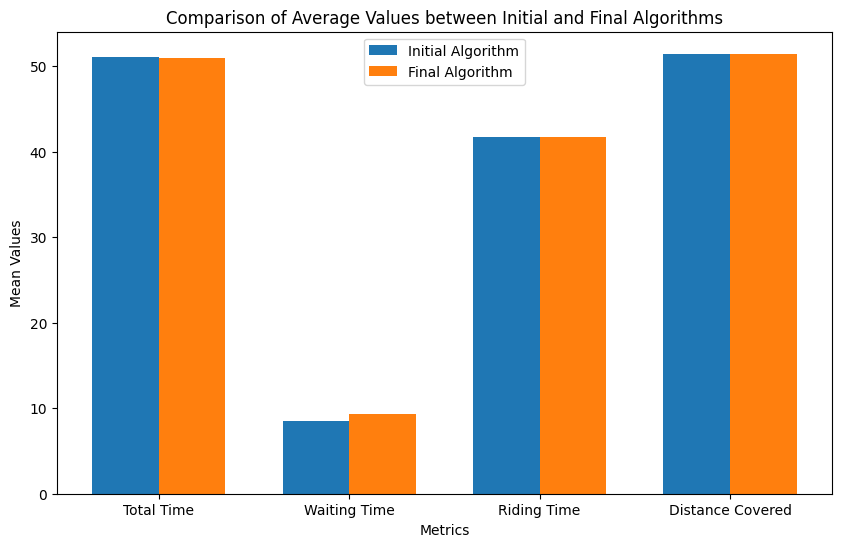

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

final_att = df["final_el_id_tot_time"].mean()
final_awt = df["final_el_id_waiting_time"].mean()
final_art = df["final_el_id_riding_time"].mean()
final_ad = df["final_dist"].mean()

fin_att = df["fin_el_id_tot_time"].mean()
fin_awt = df["fin_el_id_waiting_time"].mean()
fin_art = df["fin_el_id_riding_time"].mean()
fin_ad = df["fin_dist"].mean()

metrics_names = ['Total Time', 'Waiting Time', 'Riding Time', 'Distance Covered']

final_values = [final_att, final_awt, final_art, final_ad]
initial_values = [fin_att, fin_awt, fin_art, fin_ad]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(metrics_names)), initial_values, bar_width, label='Initial Algorithm')
bar2 = ax.bar(np.arange(len(metrics_names)) + bar_width, final_values, bar_width, label='Final Algorithm')

ax.set_xlabel('Metrics')
ax.set_ylabel('Mean Values')
ax.set_title('Comparison of Average Values between Initial and Final Algorithms')
ax.set_xticks(np.arange(len(metrics_names)) + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.show()


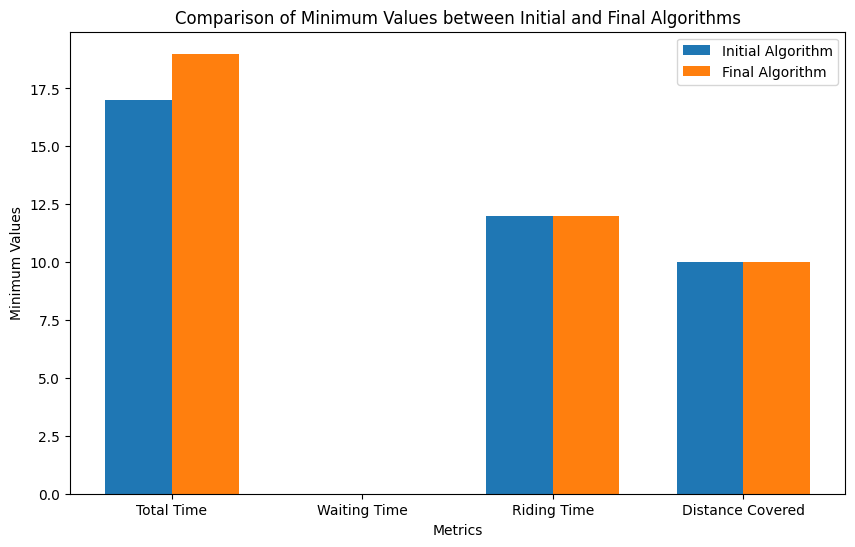

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

final_mtt = df["final_el_id_tot_time"].min()
final_mwt = df["final_el_id_waiting_time"].min()
final_mrt = df["final_el_id_riding_time"].min()
final_md = df["final_dist"].min()

fin_mtt = df["fin_el_id_tot_time"].min()
fin_mwt = df["fin_el_id_waiting_time"].min()
fin_mrt = df["fin_el_id_riding_time"].min()
fin_md = df["fin_dist"].min()

metrics_names = ['Total Time', 'Waiting Time', 'Riding Time', 'Distance Covered']

final_min_values = [final_mtt, final_mwt, final_mrt, final_md]
initial_min_values = [fin_mtt, fin_mwt, fin_mrt, fin_md]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(metrics_names)), initial_min_values, bar_width, label='Initial Algorithm')
bar2 = ax.bar(np.arange(len(metrics_names)) + bar_width, final_min_values, bar_width, label='Final Algorithm')

ax.set_xlabel('Metrics')
ax.set_ylabel('Minimum Values')
ax.set_title('Comparison of Minimum Values between Initial and Final Algorithms')
ax.set_xticks(np.arange(len(metrics_names)) + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.legend()

plt.show()


In [ ]:


selected_columns=['Requested To Floor','dist_el_id','time_el_id']
df1=df[selected_columns]


# Convert DataFrame to JSON
json_output = df1.to_json(orient='records', lines=True)

# Print or use the JSON output
print(json_output)


{"Requested To Floor":7,"dist_el_id":1.0,"time_el_id":1.0}
{"Requested To Floor":1,"dist_el_id":1.0,"time_el_id":1.0}
{"Requested To Floor":3,"dist_el_id":1.0,"time_el_id":1.0}
{"Requested To Floor":8,"dist_el_id":1.0,"time_el_id":1.0}
{"Requested To Floor":2,"dist_el_id":1.0,"time_el_id":1.0}
{"Requested To Floor":4,"dist_el_id":1.0,"time_el_id":1.0}
{"Requested To Floor":6,"dist_el_id":1.0,"time_el_id":1.0}
{"Requested To Floor":7,"dist_el_id":2.0,"time_el_id":2.0}
{"Requested To Floor":2,"dist_el_id":2.0,"time_el_id":2.0}
{"Requested To Floor":8,"dist_el_id":2.0,"time_el_id":2.0}
{"Requested To Floor":1,"dist_el_id":1.0,"time_el_id":1.0}
{"Requested To Floor":8,"dist_el_id":2.0,"time_el_id":2.0}
{"Requested To Floor":4,"dist_el_id":2.0,"time_el_id":2.0}
{"Requested To Floor":6,"dist_el_id":2.0,"time_el_id":2.0}
{"Requested To Floor":3,"dist_el_id":2.0,"time_el_id":2.0}
{"Requested To Floor":7,"dist_el_id":2.0,"time_el_id":2.0}
{"Requested To Floor":9,"dist_el_id":2.0,"time_el_id":2.

# Algorithms to optimize elevator operations and improve efficiency

## TIme

In [ ]:
#Time
class Lift:
    def __init__(self, id):
        self.id = id
        self.current_floor = 1  # Assuming lifts start from the first floor

def get_travel_dist(current_floor, target_floor, from_floor):
    travel_dist = (abs(from_floor - target_floor) + abs(from_floor - current_floor)) * 10
    return travel_dist


def get_travel_time(current_floor, target_floor):
    travel_time = abs(current_floor - target_floor)*7
    return travel_time


def get_waiting_time(nst):
    return 5*nst


In [ ]:
import pandas as pd
from datetime import datetime, time


class Lift:
    def __init__(self, lift_id, current_floor=1):
        self.id = lift_id
        self.current_floor = current_floor

def get_weighted_metric(travel_dist, waiting_time, distance_weight=0.6, waiting_time_weight=0.4):
    return distance_weight * travel_dist + waiting_time_weight * waiting_time
# assign_lift(requested_floor, lifts, current_time,requested_from_floor, nst )

def assign_lift(requested_floor, lifts, current_time, from_floor, nst):
    min_weighted_metric = float('inf')
    assigned_lift = None
    nstwf = 0

    for lift in lifts:
        travel_dist = get_travel_dist(lift.current_floor, requested_floor, from_floor)
        a = abs(lift.current_floor - from_floor)
        if a <= 0:
            nstw = 0
        else:
            nstw = np.random.randint(0, a)

        travel_time = get_travel_time(lift.current_floor, from_floor) + get_travel_time(from_floor, requested_floor) + get_waiting_time(nst) + get_waiting_time(nstw)
        total_metric = get_weighted_metric(travel_dist, travel_time)

        if total_metric < min_weighted_metric:
            min_weighted_metric = total_metric
            assigned_lift = lift
            nstwf = nstw

    return assigned_lift, min_weighted_metric

def simulate_lift_calls(lifts, df):
    for index, row in df.iterrows():
        requested_from_floor = row['Requested From Floor']
        requested_floor = row['Requested To Floor']
        current_time = row['Time']
        nst = row['No of stops']


        assigned_lift, metric = assign_lift(requested_floor, lifts, current_time,requested_from_floor, nst )

        print(f"Call to Floor {requested_floor}: Assign Lift {assigned_lift.id}, Weighted Metric: {metric:.2f}")

        # Move the assigned lift
        assigned_lift.current_floor = requested_floor

lifts = [Lift(1), Lift(2), Lift(3)]
simulate_lift_calls(lifts, df)


Call to Floor 7: Assign Lift 1, Weighted Metric: 58.80
Call to Floor 1: Assign Lift 1, Weighted Metric: 54.80
Call to Floor 3: Assign Lift 1, Weighted Metric: 129.20
Call to Floor 8: Assign Lift 1, Weighted Metric: 50.00
Call to Floor 2: Assign Lift 1, Weighted Metric: 60.80
Call to Floor 4: Assign Lift 1, Weighted Metric: 47.20
Call to Floor 6: Assign Lift 1, Weighted Metric: 37.20
Call to Floor 7: Assign Lift 2, Weighted Metric: 58.80
Call to Floor 2: Assign Lift 2, Weighted Metric: 83.20
Call to Floor 8: Assign Lift 2, Weighted Metric: 56.80
Call to Floor 1: Assign Lift 1, Weighted Metric: 67.60
Call to Floor 8: Assign Lift 2, Weighted Metric: 43.20
Call to Floor 4: Assign Lift 2, Weighted Metric: 58.80
Call to Floor 6: Assign Lift 2, Weighted Metric: 25.60
Call to Floor 3: Assign Lift 2, Weighted Metric: 32.40
Call to Floor 7: Assign Lift 2, Weighted Metric: 41.20
Call to Floor 9: Assign Lift 2, Weighted Metric: 23.60
Call to Floor 2: Assign Lift 2, Weighted Metric: 65.60
Call to F

In [ ]:
rfff = df['Requested From Floor'].value_counts().sort_index()
rtff = df['Requested To Floor'].value_counts().sort_index()

print("Requested From Floor counts:")
print(rfff)

print("\nRequested To Floor counts:")
print(rtff)


Requested From Floor counts:
1    15
2    16
3    12
4    18
5    15
6     9
7    14
8    12
9    14
Name: Requested From Floor, dtype: int64

Requested To Floor counts:
1    14
2    14
3    17
4    13
5    11
6    17
7    11
8    17
9    11
Name: Requested To Floor, dtype: int64


## For distance

In [ ]:
### distance

class Lift:
    def __init__(self, id):
        self.id = id
        self.current_floor = 1  # Assuming lifts start from the first floor

def get_travel_dist(current_floor, target_floor,from_floor):
    # Simulating dynamic traffic conditions

    travel_dist=(abs(from_floor - target_floor) + abs(from_floor - current_floor))*10
    return travel_dist

def get_travel_time(current_floor, target_floor):
    travel_time = abs(current_floor - target_floor)*7
    return travel_time


def get_waiting_time(nst):
    return 5*nst

def assign_lift(requested_floor, lifts,from_floor):
    min_total_dist = float('inf')
    assigned_lift = None

    for lift in lifts:
        travel_dist = get_travel_dist(lift.current_floor, requested_floor,from_floor)
        total_dist = travel_dist
        if total_dist < min_total_dist:
            min_total_dist = total_dist
            assigned_lift = lift

    return assigned_lift,min_total_dist


In [ ]:
import pandas as pd
from datetime import datetime, time



class Lift:
    def __init__(self, lift_id, current_floor=1):
        self.id = lift_id
        self.current_floor = current_floor


def get_weighted_metric(travel_dist, waiting_time, distance_weight=0.6, waiting_time_weight=0.4):
    return distance_weight * travel_dist + waiting_time_weight * waiting_time

def assign_lift(requested_floor, lifts, current_time, from_floor):
    min_weighted_metric = float('inf')
    assigned_lift = None

    for lift in lifts:
        travel_dist = get_travel_dist(lift.current_floor, requested_floor, from_floor)
        travel_time = get_travel_time(from_floor, requested_floor)

        total_metric = get_weighted_metric(travel_dist, travel_time)

        if total_metric < min_weighted_metric:
            min_weighted_metric = total_metric
            assigned_lift = lift

    return assigned_lift, min_weighted_metric

def simulate_lift_calls(lifts, df):
    for index, row in df.iterrows():
        requested_from_floor = row['Requested From Floor']
        requested_floor = row['Requested To Floor']
        current_time = row['Time']

        assigned_lift, metric = assign_lift(requested_floor, lifts, current_time,requested_from_floor )

        print(f"Call to Floor {requested_floor}: Assign Lift {assigned_lift.id}, Weighted Metric: {metric:.2f}")

        # Move the assigned lift
        assigned_lift.current_floor = requested_floor

lifts = [Lift(1), Lift(2), Lift(3)]
simulate_lift_calls(lifts, df)


Call to Floor 7: Assign Lift 1, Weighted Metric: 50.00
Call to Floor 1: Assign Lift 1, Weighted Metric: 44.40
Call to Floor 3: Assign Lift 1, Weighted Metric: 100.80
Call to Floor 8: Assign Lift 1, Weighted Metric: 35.60
Call to Floor 2: Assign Lift 1, Weighted Metric: 52.80
Call to Floor 4: Assign Lift 1, Weighted Metric: 26.80
Call to Floor 6: Assign Lift 1, Weighted Metric: 32.40
Call to Floor 7: Assign Lift 2, Weighted Metric: 52.80
Call to Floor 2: Assign Lift 2, Weighted Metric: 73.60
Call to Floor 8: Assign Lift 2, Weighted Metric: 52.80
Call to Floor 1: Assign Lift 1, Weighted Metric: 58.80
Call to Floor 8: Assign Lift 2, Weighted Metric: 29.60
Call to Floor 4: Assign Lift 2, Weighted Metric: 50.00
Call to Floor 6: Assign Lift 2, Weighted Metric: 17.60
Call to Floor 3: Assign Lift 2, Weighted Metric: 23.60
Call to Floor 7: Assign Lift 2, Weighted Metric: 35.20
Call to Floor 9: Assign Lift 2, Weighted Metric: 17.60
Call to Floor 2: Assign Lift 2, Weighted Metric: 61.60
Call to F

## Zone Control

In [ ]:
#simplest method

df["Zones"] = 0

# Update "Zones" based on conditions
for i in range(len(df)):
    if df["Requested To Floor"][i] <= 3:
        df.at[i, "Zones"] = 1
    elif 3 < df["Requested To Floor"][i] <= 6:
        df.at[i, "Zones"] = 2
    else:
        df.at[i, "Zones"] = 3

In [ ]:
df["Zones"] = 0

df['Waiting Time'] = pd.to_timedelta(df['Waiting Time']).dt.total_seconds()

# Calculate mean waiting time for each requested floor
floor_waiting_time = df.groupby('Requested To Floor')['Waiting Time'].mean()

# Determine zones based on waiting time
df['Zones'] = df['Requested To Floor'].map(floor_waiting_time.apply(lambda x: 1 if x <= 5 else (2 if 5 < x <= 10 else 3)))


In [ ]:
##ocupancy based
df["Zones"] = 0
df["Zones"] = pd.cut(df["Occupancy"], bins=[0, 2, 5, float('inf')], labels=[1, 2, 3], include_lowest=True)


In [ ]:
##no of stops based
df["Zones"] = 0
df["Zones"] = pd.cut(df["No of stops"], bins=[0, 2, 4, float('inf')], labels=[1, 2, 3], include_lowest=True)


In [ ]:
##Combination of Waiting Time and Stops:
df["Zones"] = 0

df['Waiting Time'] = pd.to_timedelta(df['Waiting Time']).dt.total_seconds()

# Calculate mean waiting time and stops for each requested floor
floor_metrics = df.groupby('Requested To Floor').agg({'Waiting Time': 'mean', 'No of stops': 'mean'})

# Determine zones based on waiting time and stops
df['Zones'] = df['Requested To Floor'].map(floor_metrics.apply(lambda row: 1 if row['Waiting Time'] <= 5 and row['No of stops'] <= 2 else (2 if 5 < row['Waiting Time'] <= 10 and row['No of stops'] <= 4 else 3), axis=1))


## predictive dispatching

In [ ]:
class Elevator:
    def __init__(self, elevator_id):
        self.id = elevator_id
        self.current_floor = 1  # Assuming start from the first floor

    def is_idle(self):
        return True #assuming always idle.

    def request_floor(self, floor):
        print(f"Elevator {self.id} is moving to floor {floor}")


In [ ]:
rfff = df['Requested From Floor'].value_counts().sort_index()
rtff = df['Requested To Floor'].value_counts().sort_index()


def predictive_dispatching(elevator_system, floor_requests):
    for floor, count in floor_requests.iteritems():
        idle_elevators = [elevator for elevator in elevator_system.values() if elevator.is_idle()]

        if idle_elevators:
            # Choose the elevator with the highest request count for the predictive dispatching
            chosen_elevator = max(idle_elevators, key=lambda elevator: rfff.get(elevator.current_floor, 0))

            chosen_elevator.request_floor(floor)
            print(f"Sent elevator {chosen_elevator.id} to floor {floor} with {count} requests.")

elevator_system = {"Elevator1": Elevator(1), "Elevator2": Elevator(2), "Elevator3": Elevator(3)}

# Count requests for each floor
floor_requests = df["Requested To Floor"].value_counts()

# Call the predictive_dispatching function
predictive_dispatching(elevator_system, floor_requests)


Elevator 1 is moving to floor 3
Sent elevator 1 to floor 3 with 17 requests.
Elevator 1 is moving to floor 8
Sent elevator 1 to floor 8 with 17 requests.
Elevator 1 is moving to floor 6
Sent elevator 1 to floor 6 with 17 requests.
Elevator 1 is moving to floor 1
Sent elevator 1 to floor 1 with 14 requests.
Elevator 1 is moving to floor 2
Sent elevator 1 to floor 2 with 14 requests.
Elevator 1 is moving to floor 4
Sent elevator 1 to floor 4 with 13 requests.
Elevator 1 is moving to floor 7
Sent elevator 1 to floor 7 with 11 requests.
Elevator 1 is moving to floor 9
Sent elevator 1 to floor 9 with 11 requests.
Elevator 1 is moving to floor 5
Sent elevator 1 to floor 5 with 11 requests.


<ipython-input-51-88b6c0ee59ea>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for floor, count in floor_requests.iteritems():


## Ant Colony Optimization

In [ ]:
import pandas as pd
from datetime import timedelta
import numpy as np

class Elevator:
    def __init__(self, name, current_floor=1):
        self.name = name
        self.current_floor = current_floor
        self.requests = set()

    def move(self, target_floor):
        if self.current_floor < target_floor:
            self.current_floor += 1
        elif self.current_floor > target_floor:
            self.current_floor -= 1

    def request_floor(self, floor):
        self.requests.add(floor)

    def operate(self):
        while self.requests:
            target_floor = min(self.requests)
            self.move(target_floor)
            print(f"{self.name} is at floor {self.current_floor}.")
            self.requests.remove(target_floor)

class AntColonyOptimization:
    def __init__(self, elevator_system, requests, iterations=10, evaporation_rate=0.5, alpha=1.0, beta=2.0):
        self.elevator_system = elevator_system
        self.requests = requests
        self.iterations = iterations
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta

    def run(self):
        for _ in range(self.iterations):
            for request in self.requests:
                floor, requesting_elevator = request
                self.elevator_system[requesting_elevator].request_floor(floor)

            for elevator in self.elevator_system.values():
                elevator.operate()

            # Update pheromones based on the efficiency of each elevator
            total_waiting_time = sum(elevator.current_floor for elevator in self.elevator_system.values())
            pheromones = np.ones((len(self.elevator_system), len(self.elevator_system)))
            for elevator_id, elevator in self.elevator_system.items():
                efficiency = 1 / (elevator.current_floor + 1)
                pheromones[:, elevator_id - 1] *= (1 - self.evaporation_rate)
                pheromones[:, elevator_id - 1] += (efficiency + 1) * self.alpha

            # Select the elevator with the highest pheromone level for each request
            for request in self.requests:
                floor, requesting_elevator = request
                probabilities = pheromones[:, requesting_elevator - 1]  # Adjust indexing
                selected_elevator = np.argmax(probabilities)
                self.elevator_system[selected_elevator + 1].request_floor(floor)  # Adjust indexing


# Convert 'Time' to datetime.time and 'Time of Travel' to timedelta
df['Time of Travel'] = pd.to_timedelta(df['Time of Travel'])
df['Waiting Time'] = pd.to_timedelta(df['Waiting Time']).dt.total_seconds()

# Elevator instances
elevator_system = {
    1: Elevator(1),
    2: Elevator(2),
    3: Elevator(3),
}

# Create requests list
requests = list(zip(df['Requested To Floor'], df['Elevator ID']))

# Apply Ant Colony Optimization to dispatch elevators
aco = AntColonyOptimization(elevator_system, requests)
aco.run()

# Operate elevators
for elevator in elevator_system.values():
    elevator.operate()

1 is at floor 1.
1 is at floor 2.
1 is at floor 3.
1 is at floor 4.
1 is at floor 5.
1 is at floor 6.
1 is at floor 7.
1 is at floor 8.
1 is at floor 9.
2 is at floor 1.
2 is at floor 2.
2 is at floor 3.
2 is at floor 4.
2 is at floor 5.
2 is at floor 6.
2 is at floor 7.
2 is at floor 8.
2 is at floor 9.
3 is at floor 1.
3 is at floor 2.
3 is at floor 3.
3 is at floor 4.
3 is at floor 5.
3 is at floor 6.
3 is at floor 7.
3 is at floor 8.
1 is at floor 8.
1 is at floor 7.
1 is at floor 6.
1 is at floor 5.
1 is at floor 5.
1 is at floor 6.
1 is at floor 7.
1 is at floor 8.
1 is at floor 9.
2 is at floor 8.
2 is at floor 7.
2 is at floor 6.
2 is at floor 5.
2 is at floor 5.
2 is at floor 6.
2 is at floor 7.
2 is at floor 8.
2 is at floor 9.
3 is at floor 7.
3 is at floor 6.
3 is at floor 5.
3 is at floor 4.
3 is at floor 5.
3 is at floor 6.
3 is at floor 7.
3 is at floor 8.
1 is at floor 8.
1 is at floor 7.
1 is at floor 6.
1 is at floor 5.
1 is at floor 5.
1 is at floor 6.
1 is at floor 

#exceptional cases

###Manual override to set that elvator is not to participate in the Elevator group

In [ ]:
class Elevator:
    def __init__(self, elevator_id):
        self.id = elevator_id
        self.current_floor = 1  # Assuming start from the first floor
        self.available = True

    def is_available(self):
        return self.available

    def request_floor(self, floor):
        print(f"Elevator {self.id} is moving to floor {floor}")

def el_dispatching(elevator_system, floor_requests):
    for floor, count in floor_requests.iteritems():
        available_elevators = [elevator for elevator in elevator_system.values() if elevator.is_available()]

        if available_elevators:
            # Choose an available elevator based on a predictive technique (e.g., frequency of requested floor)
            chosen_elevator = available_elevators[0]
            chosen_elevator.request_floor(floor)
            print(f"Sent elevator {chosen_elevator.id} to floor {floor} with {count} requests.")

elevator_system = {"Elevator1": Elevator(1), "Elevator2": Elevator(2), "Elevator3": Elevator(3)}

# Count requests for each floor
floor_requests = df["Requested To Floor"].value_counts()

el_dispatching(elevator_system, floor_requests)


Elevator 1 is moving to floor 3
Sent elevator 1 to floor 3 with 17 requests.
Elevator 1 is moving to floor 8
Sent elevator 1 to floor 8 with 17 requests.
Elevator 1 is moving to floor 6
Sent elevator 1 to floor 6 with 17 requests.
Elevator 1 is moving to floor 1
Sent elevator 1 to floor 1 with 14 requests.
Elevator 1 is moving to floor 2
Sent elevator 1 to floor 2 with 14 requests.
Elevator 1 is moving to floor 4
Sent elevator 1 to floor 4 with 13 requests.
Elevator 1 is moving to floor 7
Sent elevator 1 to floor 7 with 11 requests.
Elevator 1 is moving to floor 9
Sent elevator 1 to floor 9 with 11 requests.
Elevator 1 is moving to floor 5
Sent elevator 1 to floor 5 with 11 requests.


<ipython-input-53-1989ec794efd>:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for floor, count in floor_requests.iteritems():


### emergency conditions or power failure

In [ ]:
# for emergency conditions the follwing happens
#1. all elevators are deemed as not available
#2. on reset all elvators go to ground floor

class Elevator:
    def __init__(self, elevator_id):
        self.id = elevator_id
        self.current_floor = 1  # Assuming start from the first floor
        self.available = True

    def is_available(self):
        return self.available

    def request_floor(self, floor):
        print(f"Elevator {self.id} is moving to floor {floor}")
        self.current_floor = floor

    def emergency(self):
        self.available = False
        self.current_floor = 1  # Reset to ground floor during an emergency

def el_dispatching(elevator_system, floor_requests):
    for floor, count in floor_requests.iteritems():
        available_elevators = [elevator for elevator in elevator_system.values() if elevator.is_available()]

        if available_elevators:
            # Apply any predictive technique (here frequency of requested floor)
            chosen_elevator = available_elevators[0]
            chosen_elevator.request_floor(floor)
            print(f"Sent elevator {chosen_elevator.id} to floor {floor} with {count} requests.")

elevator_system = {"Elevator1": Elevator(1), "Elevator2": Elevator(2), "Elevator3": Elevator(3)}

floor_requests = df["Requested To Floor"].value_counts()


el_dispatching(elevator_system, floor_requests)

# Simulate an emergency
for elevator in elevator_system.values():
    elevator.emergency()


Elevator 1 is moving to floor 3
Sent elevator 1 to floor 3 with 17 requests.
Elevator 1 is moving to floor 8
Sent elevator 1 to floor 8 with 17 requests.
Elevator 1 is moving to floor 6
Sent elevator 1 to floor 6 with 17 requests.
Elevator 1 is moving to floor 1
Sent elevator 1 to floor 1 with 14 requests.
Elevator 1 is moving to floor 2
Sent elevator 1 to floor 2 with 14 requests.
Elevator 1 is moving to floor 4
Sent elevator 1 to floor 4 with 13 requests.
Elevator 1 is moving to floor 7
Sent elevator 1 to floor 7 with 11 requests.
Elevator 1 is moving to floor 9
Sent elevator 1 to floor 9 with 11 requests.
Elevator 1 is moving to floor 5
Sent elevator 1 to floor 5 with 11 requests.


<ipython-input-54-e0b0d14da81a>:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for floor, count in floor_requests.iteritems():


# Visual Representation


In [ ]:

# Create the initial 3D scatter plot
fig = px.scatter(df, x='time_el_id',y='Requested To Floor', animation_frame='Time',animation_group="Elevator ID",
                    title='Dynamic 3D Scatter Plot',hover_name="Elevator ID",range_x=[0,3.5], range_y=[0,10],
                    labels={'Time': 'Time'})


# Update layout for better visualization

# Show the plot
fig.show()
